In [4]:
import pandas as pd

# Load files

aq = pd.read_csv(r'C:\Users\Bharadwaj\Downloads\Internship project\city_day.csv')
weather = pd.read_csv(r'C:\Users\Bharadwaj\Downloads\Internship project\combined_output.csv')

# Convert date columns to datetime
aq['Date'] = pd.to_datetime(aq['Date'])
weather['date'] = pd.to_datetime(weather['date'])  # Adjust column name if needed

# Filter Hyderabad and 2019 in both datasets
aq_hyd = aq[(aq['City'] == 'Hyderabad') & (aq['Date'].dt.year == 2019)].copy()
weather_hyd = weather[(weather['district'] == 'Hyderabad') & (weather['date'].dt.year == 2019)].copy()

# Check
print(aq_hyd.head())
print(weather_hyd.head())


            City       Date  PM2.5    PM10     NO    NO2    NOx    NH3    CO  \
16039  Hyderabad 2019-01-01  66.79  143.42  15.13  63.82  45.22  13.84  0.94   
16040  Hyderabad 2019-01-02  71.55  153.99  19.02  67.44  50.15  14.81  1.03   
16041  Hyderabad 2019-01-03  69.70  146.69  17.18  67.01  48.67  17.38  0.97   
16042  Hyderabad 2019-01-04  75.25  158.34  13.81  63.58  44.19  18.99  0.88   
16043  Hyderabad 2019-01-05  73.03  140.13   7.30  50.40  32.05  17.23  0.78   

         SO2     O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  
16039  22.51  31.99     5.59    38.44    4.12  132.0   Moderate  
16040  13.44  33.44     3.70    21.41    3.35  133.0   Moderate  
16041  13.01  32.47     3.85    29.59    6.34  141.0   Moderate  
16042  12.51  34.39     3.30    19.38    4.87  142.0   Moderate  
16043   8.17  40.43     2.17    10.09    1.25  148.0   Moderate  
         district    mandal       date  rainfall  temp_min  temp_max  \
321304  Hyderabad  Amberpet 2019-01-04       4.8   

In [6]:
import os
os.makedirs('data', exist_ok=True)

# Merge on date
merged = pd.merge(aq_hyd, weather_hyd, left_on='Date', right_on='date', how='inner')

# Drop redundant columns (e.g., 'date' from weather if not needed)
merged.drop(columns=['date'], inplace=True)

# Save merged file (optional, for backup)
merged.to_csv('data/hyd_merged_2019.csv', index=False)


In [8]:
merged = merged.sort_values(by='Date')

print(merged.isnull().sum())




City                0
Date                0
PM2.5               0
PM10                0
NO                  0
NO2                 0
NOx                 0
NH3                 0
CO                  0
SO2                 0
O3                  0
Benzene             0
Toluene             0
Xylene              0
AQI                 0
AQI_Bucket          0
district            0
mandal              0
rainfall            0
temp_min            0
temp_max            0
humidity_min        0
humidity_max        0
wind_speed_min    120
wind_speed_max    120
dtype: int64


In [9]:
# Interpolate missing wind_speed_min and wind_speed_max
merged['wind_speed_min'] = merged['wind_speed_min'].interpolate(method='linear', limit_direction='both')
merged['wind_speed_max'] = merged['wind_speed_max'].interpolate(method='linear', limit_direction='both')


In [11]:
#double checking for any extra missing valurs 
print(merged[['wind_speed_min', 'wind_speed_max']].isnull().sum())


wind_speed_min    0
wind_speed_max    0
dtype: int64


In [12]:
#EDA

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# For inline plots
%matplotlib inline

# Load merged dataset (update path if needed)
merged = pd.read_csv('data/hyd_merged_2019.csv', parse_dates=['Date'])


In [14]:
#data overview 

# Size and columns of your data
print('Shape:', merged.shape)
merged.info()

# Quick look at the first and last few rows
display(merged.head())
display(merged.tail())

# Summary statistics
display(merged.describe())


Shape: (8799, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8799 entries, 0 to 8798
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   City            8799 non-null   object        
 1   Date            8799 non-null   datetime64[ns]
 2   PM2.5           8799 non-null   float64       
 3   PM10            8799 non-null   float64       
 4   NO              8799 non-null   float64       
 5   NO2             8799 non-null   float64       
 6   NOx             8799 non-null   float64       
 7   NH3             8799 non-null   float64       
 8   CO              8799 non-null   float64       
 9   SO2             8799 non-null   float64       
 10  O3              8799 non-null   float64       
 11  Benzene         8799 non-null   float64       
 12  Toluene         8799 non-null   float64       
 13  Xylene          8799 non-null   float64       
 14  AQI             8799 non-null   float6

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,AQI_Bucket,district,mandal,rainfall,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max
0,Hyderabad,2019-01-01,66.79,143.42,15.13,63.82,45.22,13.84,0.94,22.51,...,Moderate,Hyderabad,Amberpet,0.0,10.6,31.1,24.9,67.5,0.0,1.1
1,Hyderabad,2019-01-01,66.79,143.42,15.13,63.82,45.22,13.84,0.94,22.51,...,Moderate,Hyderabad,Amberpet,0.0,10.6,31.1,24.9,67.5,0.0,1.1
2,Hyderabad,2019-01-01,66.79,143.42,15.13,63.82,45.22,13.84,0.94,22.51,...,Moderate,Hyderabad,Ameerpet,0.0,15.1,30.2,21.3,48.2,0.0,0.1
3,Hyderabad,2019-01-01,66.79,143.42,15.13,63.82,45.22,13.84,0.94,22.51,...,Moderate,Hyderabad,Ameerpet,0.0,15.1,30.2,21.3,48.2,0.0,0.1
4,Hyderabad,2019-01-01,66.79,143.42,15.13,63.82,45.22,13.84,0.94,22.51,...,Moderate,Hyderabad,Asifnagar,0.0,12.1,29.5,22.5,80.9,0.0,1.4


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,AQI_Bucket,district,mandal,rainfall,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max
8794,Hyderabad,2019-12-31,47.37,82.17,8.73,30.94,22.41,14.24,0.68,5.25,...,Moderate,Hyderabad,Golkonda,0.0,19.95,26.800,56.050,85.600,5.5,21.4
8795,Hyderabad,2019-12-31,47.37,82.17,8.73,30.94,22.41,14.24,0.68,5.25,...,Moderate,Hyderabad,Bahadurpura,0.0,20.10,26.980,51.940,82.020,1.6,8.4
8796,Hyderabad,2019-12-31,47.37,82.17,8.73,30.94,22.41,14.24,0.68,5.25,...,Moderate,Hyderabad,Bandlaguda,0.0,19.92,27.180,54.060,85.420,0.6,7.0
8797,Hyderabad,2019-12-31,47.37,82.17,8.73,30.94,22.41,14.24,0.68,5.25,...,Moderate,Hyderabad,Charminar,0.0,20.50,27.325,54.350,84.450,1.4,8.4
8798,Hyderabad,2019-12-31,47.37,82.17,8.73,30.94,22.41,14.24,0.68,5.25,...,Moderate,Hyderabad,Saidabad,0.0,20.25,27.550,51.875,84.425,0.6,3.4


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,rainfall,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max
count,8799.000000,8799.000000,8799.000000,8799.000000,8799.000000,8799.000000,8799.000000,8799.000000,8799.000000,8799.000000,8799.000000,8799.000000,8799.000000,8799.000000,8799.000000,8799.000000,8799.000000,8799.000000,8679.000000,8679.000000
mean,42.524120,95.128594,4.866293,30.960044,19.708412,14.258183,0.579156,7.125492,30.652755,1.553983,10.435703,2.030124,96.357313,1.854995,23.815617,34.550937,37.843509,75.171352,0.330994,7.352230
std,19.969894,40.231672,2.964518,12.515572,8.283926,4.182279,0.157953,3.280499,10.931479,1.236606,9.355353,2.912563,34.932538,7.515187,3.941870,4.495657,17.740618,16.354269,0.773576,7.528679
min,6.240000,12.530000,1.460000,7.090000,4.340000,4.280000,0.270000,2.470000,12.080000,0.050000,0.230000,0.000000,32.000000,0.000000,9.200000,20.300000,7.000000,22.800000,0.000000,0.100000
25%,27.500000,62.680000,3.030000,21.750000,13.670000,11.560000,0.460000,5.070000,21.070000,0.640000,3.900000,0.310000,69.000000,0.000000,21.400000,30.900000,22.900000,63.100000,0.000000,2.900000
50%,41.000000,102.320000,3.950000,30.620000,19.030000,14.050000,0.580000,6.190000,30.220000,1.300000,7.860000,0.950000,100.000000,0.000000,23.800000,34.400000,33.200000,79.300000,0.000000,6.300000
75%,57.610000,126.810000,5.650000,39.350000,24.610000,16.790000,0.670000,8.610000,37.840000,2.050000,13.545000,2.350000,120.000000,0.000000,26.200000,38.300000,51.900000,88.300000,0.300000,9.600000
max,86.180000,166.230000,19.020000,71.550000,51.580000,28.920000,1.080000,28.830000,61.910000,6.740000,58.970000,19.000000,186.000000,149.700000,32.800000,44.800000,96.800000,100.000000,10.300000,65.100000


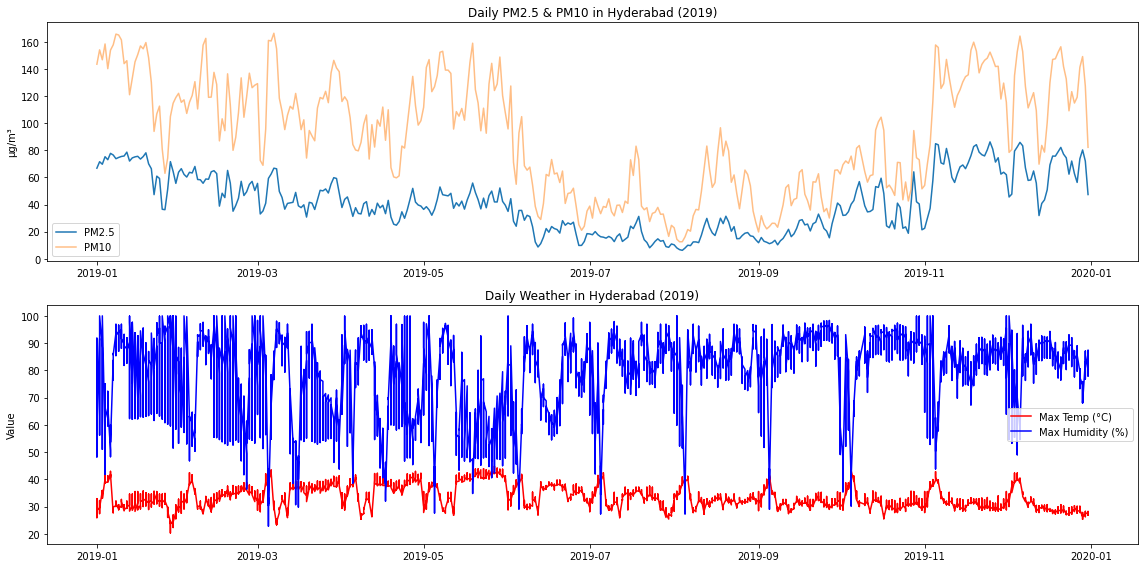

In [16]:
#  Time Series Plot: Pollution and Weather Trends

# Plot PM2.5, PM10, Temp_max, Humidity_max over the year
plt.figure(figsize=(16,8))

plt.subplot(2,1,1)
plt.plot(merged['Date'], merged['PM2.5'], label='PM2.5')
plt.plot(merged['Date'], merged['PM10'], label='PM10', alpha=0.5)
plt.ylabel('µg/m³')
plt.title('Daily PM2.5 & PM10 in Hyderabad (2019)')
plt.legend()

plt.subplot(2,1,2)
plt.plot(merged['Date'], merged['temp_max'], label='Max Temp (°C)', color='red')
plt.plot(merged['Date'], merged['humidity_max'], label='Max Humidity (%)', color='blue')
plt.ylabel('Value')
plt.title('Daily Weather in Hyderabad (2019)')
plt.legend()
plt.tight_layout()
plt.show()


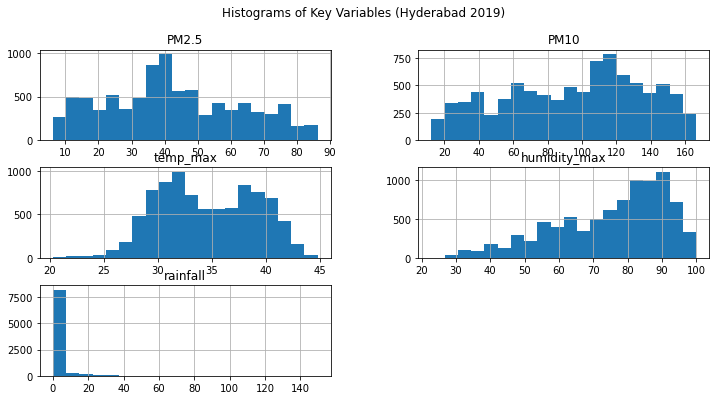

In [17]:
# Distribution Plot (Histogram) for Main Variables
columns_for_hist = ['PM2.5', 'PM10', 'temp_max', 'humidity_max', 'rainfall']
merged[columns_for_hist].hist(bins=20, figsize=(12,6))
plt.suptitle('Histograms of Key Variables (Hyderabad 2019)')
plt.show()


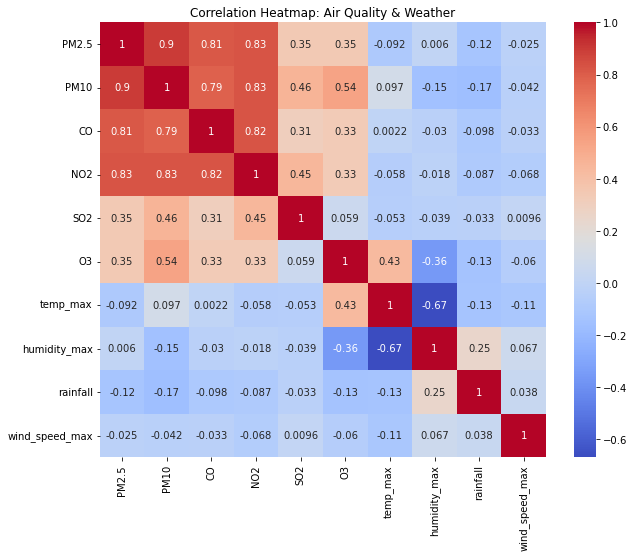

In [18]:
#Correlation Heatmap (Pollution vs. Weather)
# Focus on pollution and weather numeric columns
cols = ['PM2.5', 'PM10', 'CO', 'NO2', 'SO2', 'O3', 'temp_max', 'humidity_max', 'rainfall', 'wind_speed_max']
corr = merged[cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Air Quality & Weather')
plt.show()


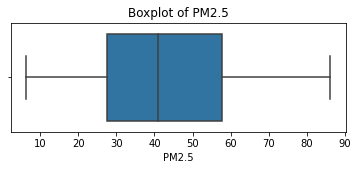

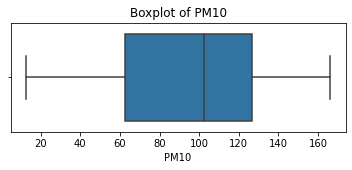

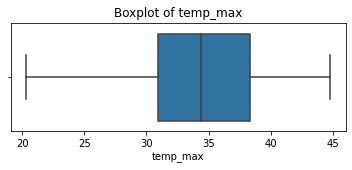

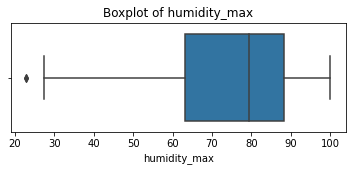

In [20]:
#Outlier Detection (Boxplots)
for col in ['PM2.5', 'PM10', 'temp_max', 'humidity_max']:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=merged[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


## EDA Insights Summary (Hyderabad 2019)

- PM2.5 and PM10 levels peak between **March–June** and **October–December**, showing seasonal patterns.
- **Rainfall** events appear to lower pollution levels, especially during the **monsoon (July–September)**.
- There is a moderate **negative correlation between temperature and particulate matter**.
- Periods of high **humidity** often align with **lower pollution**, likely due to rain and moisture dispersion.
- A few outlier days show **extremely high PM2.5 values**, likely caused by specific events or dry/stagnant air.


In [22]:
#Feature Engineering 
import pandas as pd
import numpy as np

# If reloading your merged file
df = pd.read_csv('data/hyd_merged_2019.csv', parse_dates=['Date'])


In [23]:
# creating lag features 

# One-day lag for PM2.5
df['PM2.5_lag1'] = df['PM2.5'].shift(1)

# 3-day rolling mean for PM2.5
df['PM2.5_roll3'] = df['PM2.5'].rolling(window=3).mean()


In [25]:
# adding calendar features 
df['month'] = df['Date'].dt.month
df['dayofweek'] = df['Date'].dt.dayofweek  # Monday=0, Sunday=6
df['is_weekend'] = df['dayofweek'].isin([5,6]).astype(int)


In [27]:
# fill NaN values from shifts 

df.fillna(method='bfill', inplace=True)  # Or use dropna() if you want to drop them


In [28]:
print(df.head())
print(df.columns)


        City       Date  PM2.5    PM10     NO    NO2    NOx    NH3    CO  \
0  Hyderabad 2019-01-01  66.79  143.42  15.13  63.82  45.22  13.84  0.94   
1  Hyderabad 2019-01-01  66.79  143.42  15.13  63.82  45.22  13.84  0.94   
2  Hyderabad 2019-01-01  66.79  143.42  15.13  63.82  45.22  13.84  0.94   
3  Hyderabad 2019-01-01  66.79  143.42  15.13  63.82  45.22  13.84  0.94   
4  Hyderabad 2019-01-01  66.79  143.42  15.13  63.82  45.22  13.84  0.94   

     SO2  ...  temp_max  humidity_min  humidity_max  wind_speed_min  \
0  22.51  ...      31.1          24.9          67.5             0.0   
1  22.51  ...      31.1          24.9          67.5             0.0   
2  22.51  ...      30.2          21.3          48.2             0.0   
3  22.51  ...      30.2          21.3          48.2             0.0   
4  22.51  ...      29.5          22.5          80.9             0.0   

   wind_speed_max PM2.5_lag1 PM2.5_roll3 month  dayofweek  is_weekend  
0             1.1      66.79       66.79    

In [30]:
#MODELLING AND PREDICTION
# TRAIN AND TEST DATA 

from sklearn.model_selection import train_test_split

# Example: We'll predict PM2.5 using all other *engineering* & weather features
features = [
    'PM2.5_lag1', 'PM2.5_roll3', 'month', 'dayofweek', 'is_weekend',
    'temp_max', 'humidity_max', 'rainfall', 'wind_speed_max'
]
target = 'PM2.5'

# Remove any last rows with NaNs, just in case
df = df.dropna(subset=features + [target])

X = df[features]
y = df[target]

# Use 80% first part for training, 20% end part for testing (time-based split)
split_index = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]


In [32]:
# FITTING A SIMPLE REGRESSION MODEL 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [36]:
# EVALUATING MODEL PERFORMANCE 

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R2 Score: {r2:.2f}')  # This is your "accuracy" for regression!

# PERCENTAGE ACCURACY 

mape = np.mean(np.abs((y_test - y_pred)/y_test)) * 100
print(f'MAPE: {mape:.2f}%')


MAE: 1.56
RMSE: 2.90
R2 Score: 0.98
MAPE: 2.59%


**Model Results:**
- MAE: 1.56 µg/m³
- RMSE: 2.90 µg/m³
- R² Score: 0.98 (98% of variance explained—very strong accuracy!)
- MAPE: 2.59%



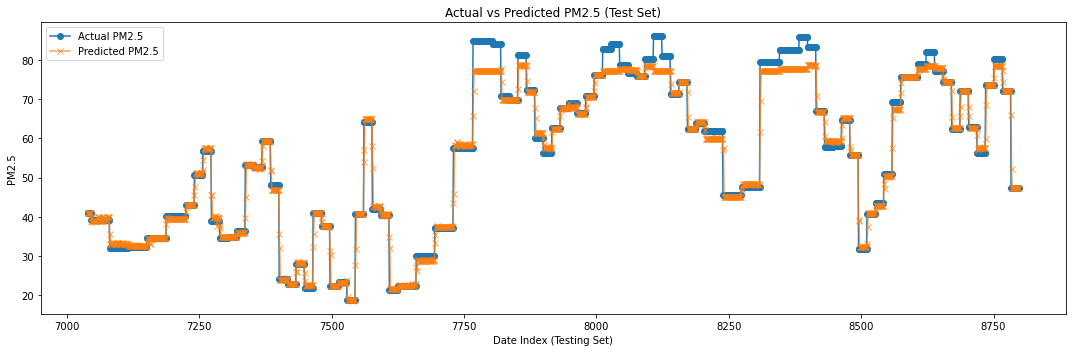

In [35]:
# PLOTTING RESULTS FOR VISUAL QUALITY CHECK 

import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(y_test.index, y_test.values, label='Actual PM2.5', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted PM2.5', marker='x', alpha=0.7)
plt.xlabel('Date Index (Testing Set)')
plt.ylabel('PM2.5')
plt.title('Actual vs Predicted PM2.5 (Test Set)')
plt.legend()
plt.tight_layout()
plt.show()


In [37]:
# save/export model 

import joblib
joblib.dump(model, 'data/pm25_rf_model_hyd_2019.pkl')


['data/pm25_rf_model_hyd_2019.pkl']

In [38]:
# Deploying 

from flask import Flask, request, render_template
import joblib
import numpy as np

app = Flask(__name__)
model = joblib.load('data/pm25_rf_model_hyd_2019.pkl')

@app.route('/', methods=['GET', 'POST'])
def predict():
    if request.method == 'POST':
        # Get data from form
        input_data = [float(request.form[col]) for col in ['PM2.5_lag1','PM2.5_roll3','month','dayofweek','is_weekend','temp_max','humidity_max','rainfall','wind_speed_max']]
        prediction = model.predict([input_data])[0]
        return render_template('index.html', prediction=round(prediction, 2))
    return render_template('index.html')

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\Bharadwaj\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3452: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
